# Linear Regression


### Initialization

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.model_selection import train_test_split

filename = "encoded_data_03_12.csv"
df = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df.head()

,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,age_at_evaluation,log_market_value_base10,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,35,6.60206,6.445992,6.241155,6.659857,6.525779
1,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,35,6.30103,6.445992,6.241155,6.659857,6.525779
2,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,36,6.00000,6.445992,6.241155,6.659857,6.525779
3,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,36,6.00000,6.445992,6.241155,6.659857,6.525779
4,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,37,6.00000,6.445992,6.241155,6.659857,6.525779


In [4]:
X = df.drop(columns=['log_market_value_base10'])
y = df['log_market_value_base10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Reverse normalization for actual values
y_test_original = np.power(10, y_test)

# Reverse normalization for predicted values
y_pred_original = np.power(10, y_pred)

# Calculate the mean squared error
mse = sklearn.metrics.mean_squared_error(y_true=y_test_original, y_pred=y_pred_original)

print(f'Mean Squared Error: {mse}')

# Calculate the mean squared percentage error
percentage_error = (mse / y_test_original.mean()) * 100
print(f'Mean squared Percentage Error: {percentage_error}%')

# Initialize an empty list to store percentage errors
percentage_errors = []

# Calculate the percentage error for each prediction
for i in range(len(y_pred_original)):
    pred = y_pred_original[i]
    actual = y_test_original.values[i]  # Convert to array for indexing
    percentage_error = ((pred - actual) / actual) * 100
    percentage_errors.append(percentage_error)

# Calculate the mean percentage error
mean_percentage_error = np.mean(percentage_errors)
print(f'Mean Percentage Error: {mean_percentage_error}%')   

# Calculate Mean Absolute Percentage Error (MAPE)
absolute_percentage_errors = np.abs((y_pred_original - y_test_original) / y_test_original) * 100
mape = np.mean(absolute_percentage_errors)

result = sklearn.metrics.mean_absolute_percentage_error(y_pred=y_pred_original, y_true=y_test_original)
print("MAPE", result)

from sklearn.metrics import root_mean_squared_log_error
print("RMSLE", root_mean_squared_log_error(y_true=y_test, y_pred=y_pred))
# Calculate Accuracy
accuracy = (1 - (mape / 100)) * 100
print(f'Accuracy: {accuracy}%')



Mean Squared Error: 59927753102804.27
Mean squared Percentage Error: 1170192165.6517847%
Mean Percentage Error: 51.475647276316636%
MAPE 0.9384401087118113
RMSLE 0.05121012462698778
Accuracy: 6.155989128818873%


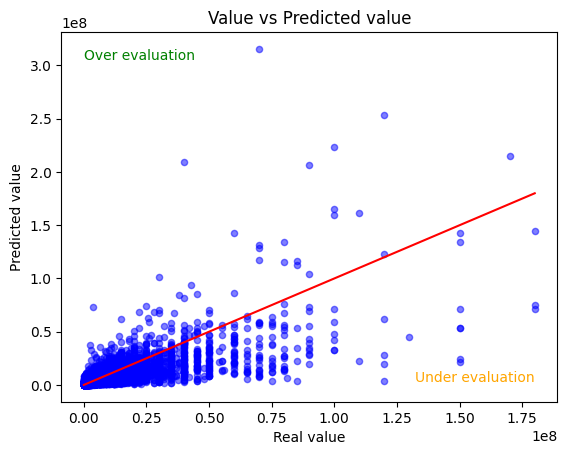

In [6]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red')
plt.text(min(y_test_original), max(y_pred_original), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

plt.show()


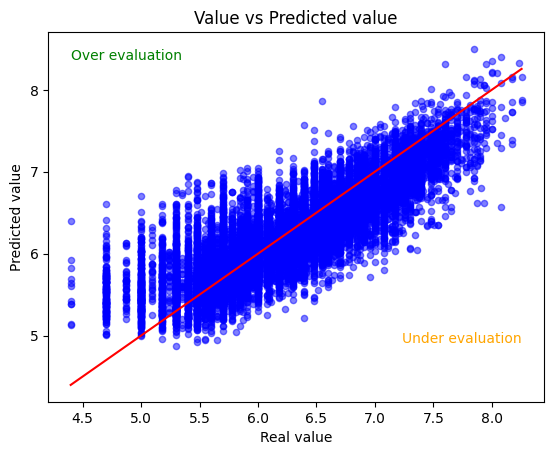

In [8]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

plt.show()
